In [4]:
import cv2
import json
import imgaug as ia
import imgaug.augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
from google.colab.patches import cv2_imshow

In [3]:
f = open("Melli.json", encoding="utf8")
data = json.load(f)
f.close()

points = []
for shape in data["shapes"]:
  points.append([shape['points'][0][0], shape['points'][0][1], shape['points'][2][0], shape['points'][2][1]])

BB 0: (151.2712, 123.7288, 251.2712, 238.1356) -> (181.9230, 191.4931, 255.1774, 280.0155)
BB 1: (307.2034, 125.4237, 406.3559, 237.2881) -> (263.7980, 212.5133, 336.1591, 299.2441)
BB 2: (481.7797, 77.1186, 577.5424, 181.3559) -> (358.2815, 203.5043, 427.5102, 284.7518)
BB 3: (669.0678, 122.8814, 754.6610, 227.1186) -> (454.3463, 257.1038, 518.1403, 337.0532)
BB 4: (829.2373, 118.6441, 902.1186, 214.4068) -> (539.4221, 274.8553, 594.9551, 347.5704)
BB 5: (986.8644, 108.4746, 1074.1525, 216.1017) -> (621.0679, 288.2976, 686.3548, 370.7080)
BB 6: (919.9153, 214.4068, 994.4915, 321.1864) -> (581.3453, 348.4926, 639.6920, 428.7194)
BB 7: (710.5932, 235.5932, 784.3220, 340.6780) -> (470.9391, 335.5326, 528.5394, 414.5288)
BB 8: (497.0339, 250.8475, 582.6271, 353.3898) -> (358.6082, 318.1881, 422.1087, 397.0152)
BB 9: (316.5254, 258.4746, 390.2542, 366.1017) -> (263.2272, 300.0626, 321.2679, 380.7423)
BB 10: (141.1017, 277.1186, 217.3729, 381.3559) -> (170.8581, 289.7910, 229.6703, 368.5506

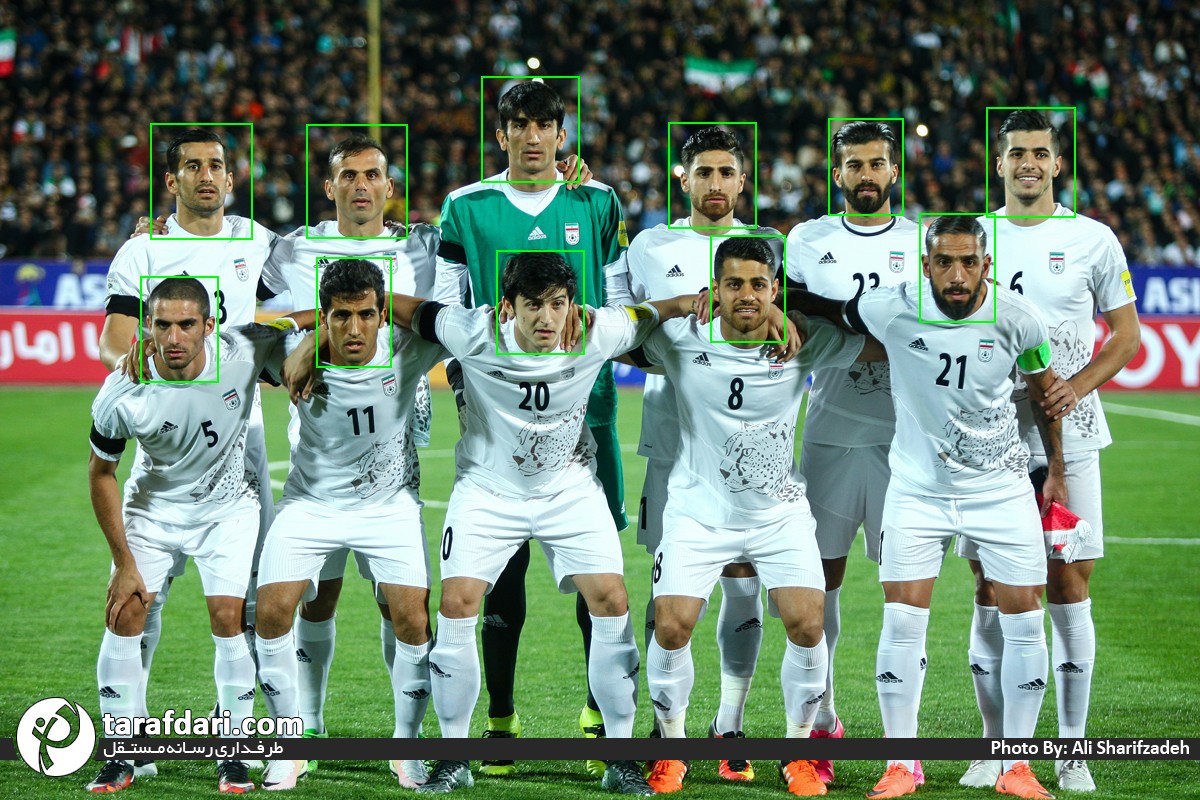

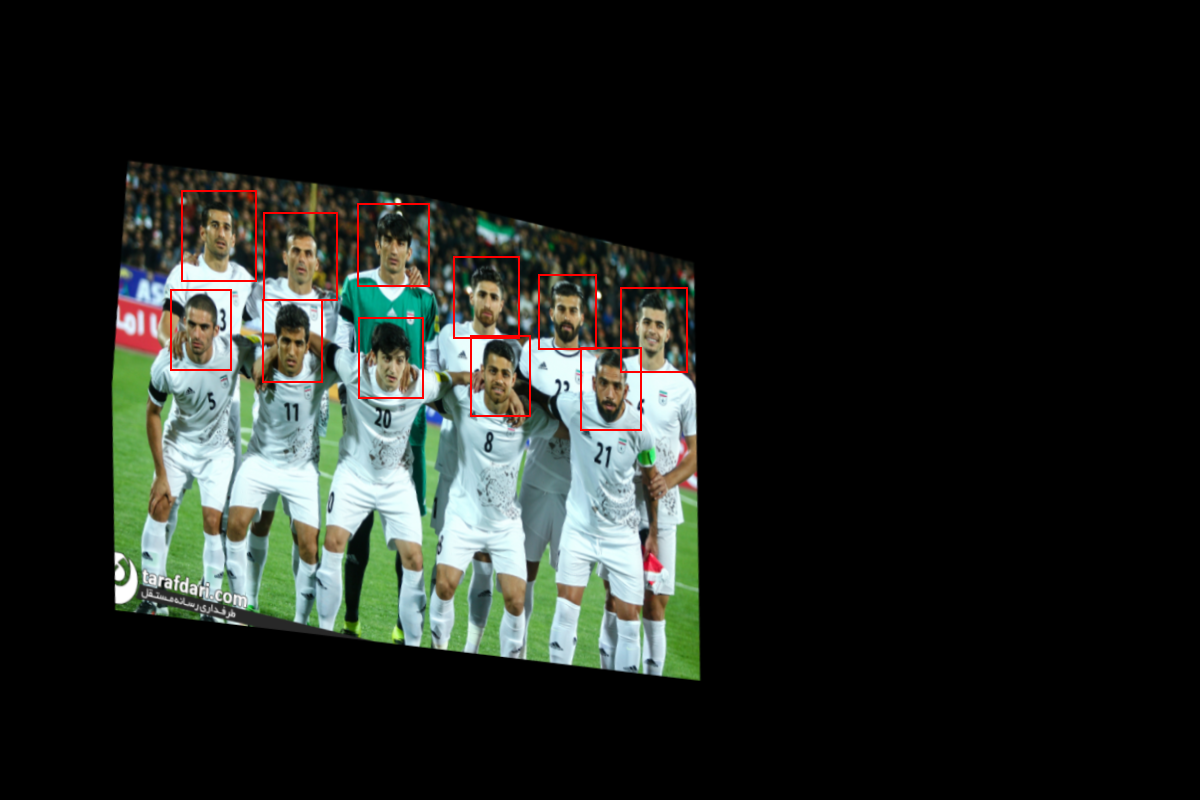

In [12]:
ia.seed(1)
image = cv2.imread("Melli.jpg")

bbs = ia.augmentables.bbs.BoundingBoxesOnImage(
    [ia.augmentables.bbs.BoundingBox(x1=p[0], y1=p[1], x2=p[2], y2=p[3]) for p in points], shape=image.shape)

seq = iaa.Sequential([
    iaa.Crop(percent=(0, 0.1)),
    iaa.Affine(rotate=(-45, 45)),
    iaa.Affine(translate_px={"x": 40, "y": 60}),
    iaa.Affine(scale=(0.5, 0.7)),
    iaa.Affine(shear=(-16, 16)),
    iaa.Affine(translate_percent={"x": -0.20}, mode=ia.ALL, cval=(0, 255)),
    iaa.ScaleX((0.5, 1.5)),
    iaa.ScaleY((0.5, 1.5)),
    iaa.TranslateX(px=(-20, 20)),
    iaa.ShearX((-20, 20))
])

image_aug, bbs_aug = seq(image = image, bounding_boxes = bbs)

for i in range(len(bbs.bounding_boxes)):
    before = bbs.bounding_boxes[i]
    after = bbs_aug.bounding_boxes[i]
    print("BB %d: (%.4f, %.4f, %.4f, %.4f) -> (%.4f, %.4f, %.4f, %.4f)" % (
        i,
        before.x1, before.y1, before.x2, before.y2,
        after.x1, after.y1, after.x2, after.y2)
    )

image_before = bbs.draw_on_image(image, size=2)
image_after = bbs_aug.draw_on_image(image_aug, size=2, color=[0, 0, 255])

cv2_imshow(image_before)
cv2_imshow(image_after)
